In [1]:
import sys

sys.path.append('../src')
from data_loading import BavarianBuildingDataset, generator
from mask_rcnn import MaskRCNN
from visualize import Visualizer

In [2]:
dataset = BavarianBuildingDataset(image_dir='../data/bbd250-image', mask_dir='../data/bbd250-umring')

In [3]:
model = MaskRCNN()
model.model.summary()

Model: "Mask_RCNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 Backbone (Functional)          (None, 8, 8, 2048)   23587712    ['input_image[0][0]']            
                                                                                                  
 RPN (Functional)               [(None,),            9464368     ['Backbone[0][0]']               
                                 (None, 4)]                                                       
                                                                                          

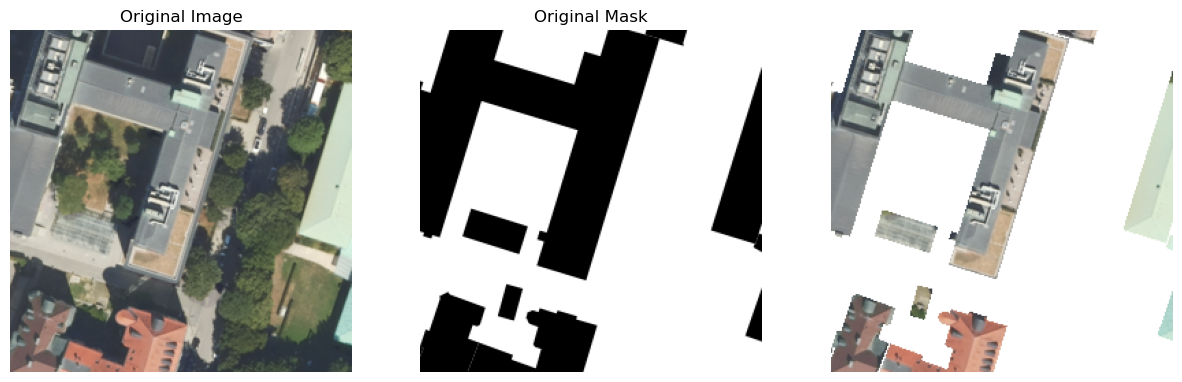

In [4]:
gen = generator(dataset, dataset.train_test_val_split()[0], batch_size=32)
images, masks = next(gen)

testing_image = images[0]
testing_mask = masks[0]

Visualizer.display_sample(testing_image, testing_mask)